How to download OHLCV data from yfinance

In [40]:
import yfinance as yf

# get ohlcv data for any ticker by period.
data_1mo_5min = yf.download("MSFT", period='1mo', interval="5m")

# get ohlcv data for any ticker by start date and end date
data_date_range = yf.download("MSFT", start="2017-01-01", end="2020-04-24")

# get intraday data for any ticker by period.
data_1mo_1d = yf.download("MSFT", period='1mo', interval="1d")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [41]:
type(data_1mo_5min)

pandas.core.frame.DataFrame

Getting data for multiple tickers


In [42]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INTC","GOOG","INFY.NS","3988.HK"]

start = dt.datetime.today()-dt.timedelta(360)
end = dt.datetime.today()

cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

ohlcv_data = {} # empty dictionary which will be filled with ohlcv dataframe for each ticker

# looping over tickers and creating a dataframe with close prices
for ticker in stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    

# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in stocks:
    ohlcv_data[ticker] = yf.download(ticker,start,end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [43]:
cl_price["INFY.NS"].head()

Date
2021-12-28            NaN
2021-12-29    1845.620483
2021-12-30    1852.765869
2021-12-31    1847.773926
2022-01-03    1858.247192
Name: INFY.NS, dtype: float64

In [44]:
ohlcv_data.keys()

dict_keys(['AMZN', 'MSFT', 'INTC', 'GOOG', 'INFY.NS', '3988.HK'])

In [45]:
ohlcv_data["INFY.NS"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-29,1883.500000,1893.800049,1876.400024,1885.550049,1845.620483,3236635
2021-12-30,1884.500000,1909.800049,1874.349976,1892.849976,1852.765869,4584738
2021-12-31,1890.000000,1898.349976,1871.650024,1887.750000,1847.773926,4619420
2022-01-03,1887.750000,1914.050049,1887.750000,1898.449951,1858.247314,3329616
2022-01-04,1898.449951,1906.650024,1878.000000,1899.150024,1858.932495,3921999
...,...,...,...,...,...,...
2022-12-19,1507.949951,1516.900024,1495.050049,1507.349976,1507.349976,6222740
2022-12-20,1501.000000,1516.000000,1482.449951,1507.300049,1507.300049,7396259
2022-12-21,1515.000000,1521.000000,1502.349976,1509.550049,1509.550049,6236361


Getting data via different package `yahoofinancials`

In [46]:
from yahoofinancials import YahooFinancials

ticker = 'MSFT'
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2018-04-24", "2020-04-24", "daily")


In [47]:
data.keys()

dict_keys(['MSFT'])

In [48]:
(data["MSFT"]["prices"])[:2]

[{'date': 1524576600,
  'high': 96.47000122070312,
  'low': 92.41000366210938,
  'open': 96.23999786376953,
  'close': 93.12000274658203,
  'volume': 34524800,
  'adjclose': 88.10441589355469,
  'formatted_date': '2018-04-24'},
 {'date': 1524663000,
  'high': 93.30000305175781,
  'low': 90.27999877929688,
  'open': 93.30000305175781,
  'close': 92.30999755859375,
  'volume': 33729300,
  'adjclose': 87.33805847167969,
  'formatted_date': '2018-04-25'}]

`yahoo_financials` give data in the form of json unlike yfiance which gives us the data in the form of a dataframe

In [49]:
import pandas as pd
from yahoofinancials import YahooFinancials
import datetime as dt

all_tickers = ["AAPL","MSFT","CSCO","AMZN","INTC"]

# extracting stock data (historical close price) for the stocks identified
close_prices = pd.DataFrame()
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    close_prices[ticker] = temp["adjclose"]
    
    
# extracting stock data (ohlcv) for the stocks identified
ohlv_dict = {}
end_date = (dt.date.today()).strftime('%Y-%m-%d')
beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d')
for ticker in all_tickers:
    yahoo_financials = YahooFinancials(ticker)
    json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
    ohlv = json_obj[ticker]['prices']
    temp = pd.DataFrame(ohlv)[["formatted_date","adjclose","open","low","high","volume"]]
    temp.set_index("formatted_date",inplace=True)
    temp.dropna(inplace=True)
    ohlv_dict[ticker] = temp

In [51]:
ohlv_dict.keys()

dict_keys(['AAPL', 'MSFT', 'CSCO', 'AMZN', 'INTC'])

In [52]:
ohlv_dict["AMZN"]

,adjclose,open,low,high,volume
formatted_date,,,,,
2017-12-26,58.838001,58.417999,58.027500,58.916000,40104000
2017-12-27,59.112999,58.995499,58.780499,59.364498,37344000
2017-12-28,59.305000,59.450001,59.219002,59.505001,36834000
2017-12-29,58.473499,59.117500,58.375000,59.200001,53768000
2018-01-02,59.450500,58.599998,58.525501,59.500000,53890000
...,...,...,...,...,...
2022-12-16,87.860001,88.269997,86.730003,89.349998,146044000
2022-12-19,84.919998,87.510002,84.510002,87.629997,83531500
2022-12-20,85.190002,85.330002,84.330002,86.610001,74348300


## OHLCV data and perform basic data operations

In [13]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above

daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AMZN       0.021027
MSFT       0.017481
BHEL.NS    0.028778
GOOG       0.017426
dtype: float64

In [21]:
daily_return["BHEL.NS"].tail(20) * 100

Date
2022-11-28   -0.671135
2022-11-29   -0.429974
2022-11-30    3.269579
2022-12-01    1.135011
2022-12-02    6.969878
2022-12-05   -3.202652
2022-12-06    0.399314
2022-12-07   -0.965907
2022-12-08    0.344229
2022-12-09   -2.229842
2022-12-12    1.461988
2022-12-13   -1.268010
2022-12-14   -0.058381
2022-12-15   -1.927572
2022-12-16   -3.752226
2022-12-19    3.712871
2022-12-20    0.238660
2022-12-21   -3.392855
2022-12-22   -2.772643
2022-12-23   -6.273770
Name: BHEL.NS, dtype: float64

## OHLCV data and perform rolling operations

In [23]:

import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).sum()

# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()
daily_return.ewm(com=10, min_periods=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,MSFT,BHEL.NS,GOOG
Date,,,,
2012-12-28,NaN,NaN,NaN,NaN
2012-12-31,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,NaN,NaN,NaN,NaN
2013-01-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2022-12-19,0.025673,0.022482,0.029035,0.023634
2022-12-20,0.024671,0.021560,0.027684,0.022774
2022-12-21,0.024638,0.020879,0.028488,0.021986


In [27]:
daily_return["BHEL.NS"].ewm(com=10, min_periods=10).mean().tail(20) * 100

Date
2022-11-28    1.122758
2022-11-29    0.981601
2022-11-30    1.189599
2022-12-01    1.184636
2022-12-02    1.710567
2022-12-05    1.263911
2022-12-06    1.185311
2022-12-07    0.989746
2022-12-08    0.931062
2022-12-09    0.643708
2022-12-12    0.718097
2022-12-13    0.537542
2022-12-14    0.483367
2022-12-15    0.264191
2022-12-16   -0.100938
2022-12-19    0.245772
2022-12-20    0.245125
2022-12-21   -0.085600
2022-12-22   -0.329877
2022-12-23   -0.870231
Name: BHEL.NS, dtype: float64

## Import OHLCV data and perform basic visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'Stock Price Evolution'}, xlabel='Date'>

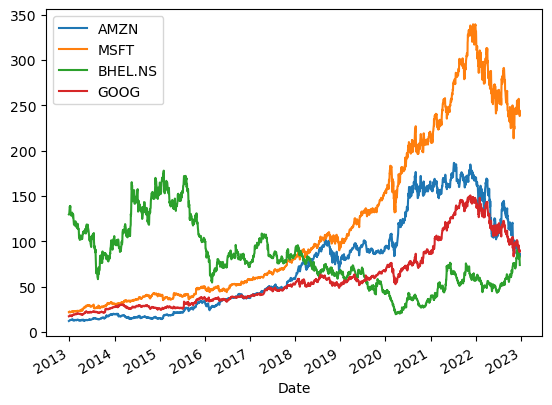

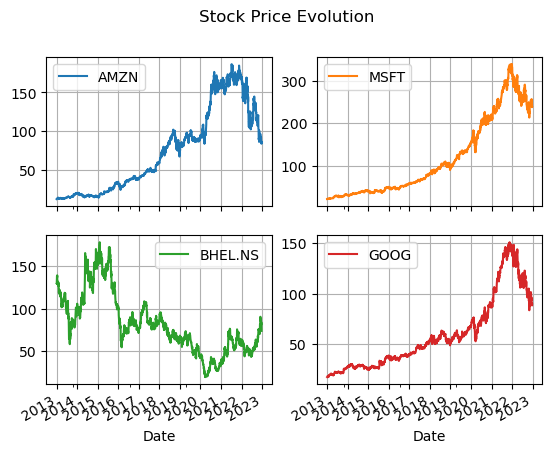

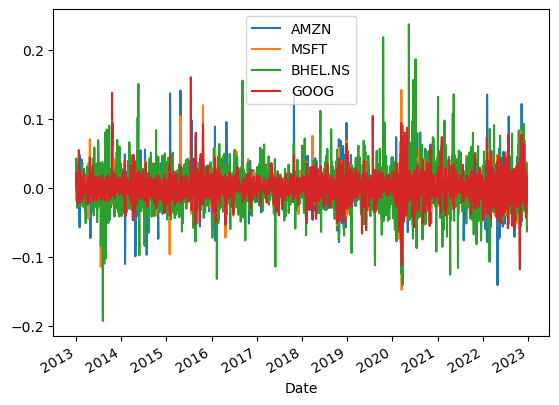

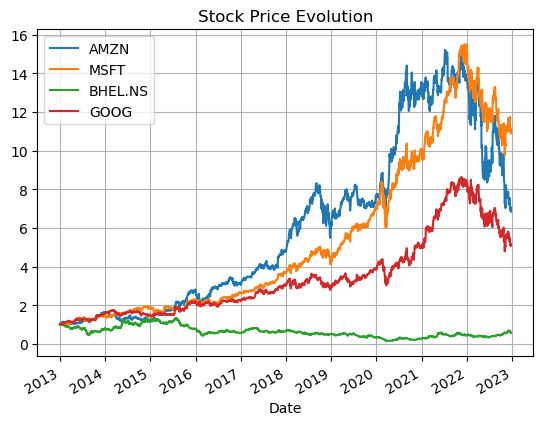

In [30]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
  
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks
  
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    
# cumprod is what we call running product in our leetcode problems 
    
    
    
    
    
    

## Import OHLCV data and perform visualizations using pyplot module

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<BarContainer object of 4 artists>

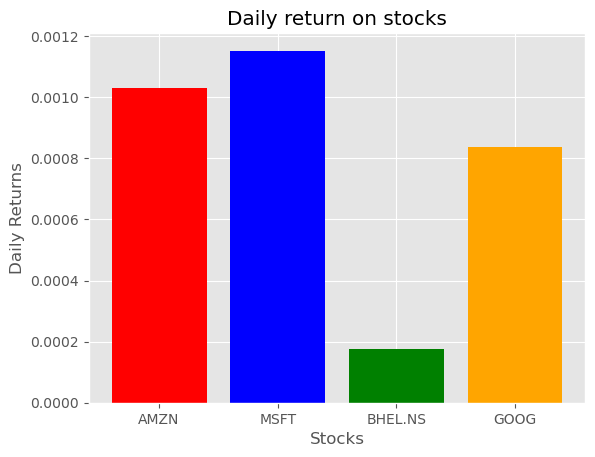

In [33]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
 
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"])
